In [17]:
import pandas as pd
import numpy as np
from datetime import date,datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN, AgglomerativeClustering, AffinityPropagation
from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer, TfidfVectorizer

from pylab import rcParams
rcParams['figure.figsize'] = 8, 6
%matplotlib inline

In [3]:
df = pd.read_csv('../data/consumer_data.csv',encoding='cp1251',parse_dates=['InvoiceDate'])
df.drop(df[df['CustomerID'].isna()].index,inplace=True)
df['CustomerID'] = df['CustomerID'].astype(int).astype(str)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


<img src="../img/sklearn_clusterisation.png" alt="hop hop loshok" height="1000" width="1000">

А по ссылке можно посмотреть базовые преимущества и недостатки методов кластеризации <br>
https://scikit-learn.org/stable/modules/clustering.html

In [8]:
df_user_product = df.groupby(['CustomerID','StockCode']).agg({
    'Quantity':sum
}).unstack(1).fillna(0)

In [6]:
df_user_product.head()

Quantity                                                           \
StockCode     10002 10080 10120 10123C 10124A 10124G 10125 10133 10135 11001   
CustomerID                                                                     
12346           0.0   0.0   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   
12347           0.0   0.0   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   
12348           0.0   0.0   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   
12349           0.0   0.0   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   
12350           0.0   0.0   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   

            ...                                                                
StockCode   ... 90214Y 90214Z BANK CHARGES   C2 CRUK    D  DOT    M PADS POST  
CustomerID  ...                                                                
12346       ...    0.0    0.0          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
12347       ...    0.0    0.0          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
12348       ...    0.0    0.0          0.0  0.0  0.0  0.0  0.0  0.0  0.0  9.0  
12349       ...    0.0    0.0          0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
12350       ...    0.0    0.0          0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  

[5 rows x 3684 columns]

In [9]:
tsne = TSNE()
transformed = tsne.fit_transform(df_user_product)

c:\python\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\python\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
c:\python\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [10]:
df_user_product.shape

(4372, 3684)

In [11]:
transformed.shape

(4372, 2)

c:\python\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  


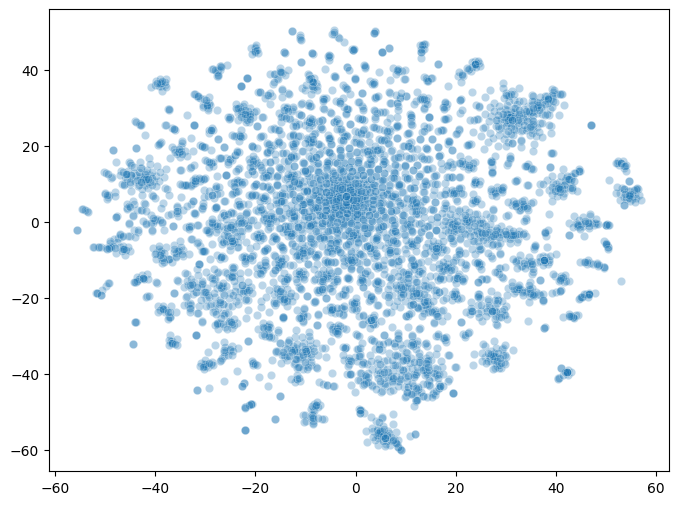

In [19]:
sns.scatterplot(
    x=transformed[:,0],y=transformed[:,1],
    palette=sns.color_palette("hls", 10),
    legend="full",
    alpha=0.3
);

судя по графику, мы видим кластеры, следовательно можно попробовать поработать с нашими данными

In [14]:
X_user_products_tfidf = TfidfTransformer().fit_transform(df_user_product.values)

In [24]:
X_user_products_tfidf.shape

(4372, 3684)

In [15]:
X_user_products_tfidf_transformed = tsne.fit_transform(X_user_products_tfidf.toarray())

c:\python\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\python\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


c:\python\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  """


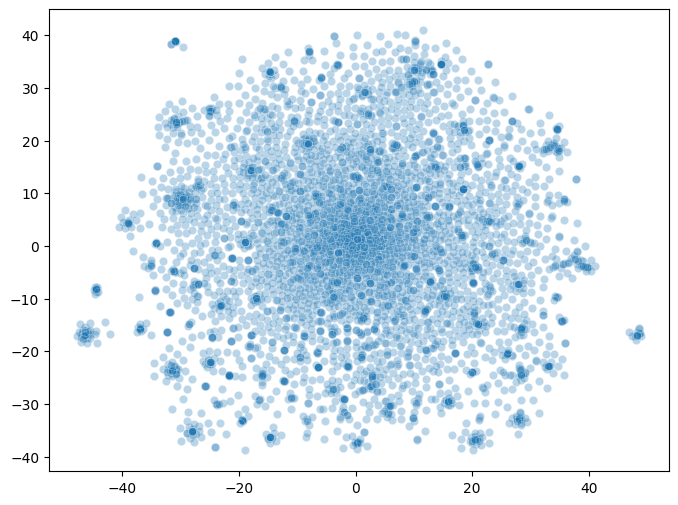

In [20]:
sns.scatterplot(
    x=X_user_products_tfidf_transformed[:,0],y=X_user_products_tfidf_transformed[:,1],
    palette=sns.color_palette("hls", 10),
    legend="full",
    alpha=0.3
);

## Например еще можно сгруппировать товары, это может понадобится например для составления переменной менее шумящей

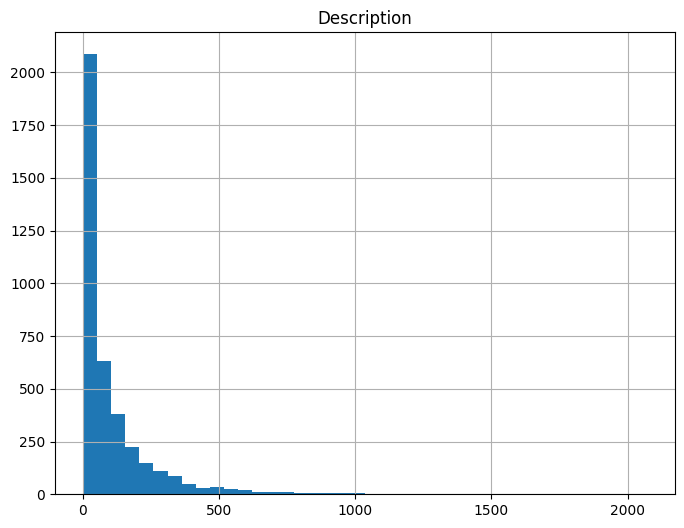

In [21]:
df.groupby('Description').agg({
    'Description':'count'
}).hist(bins=40);

In [22]:
products = df['Description'].unique()

In [33]:
products[0]

'WHITE HANGING HEART T-LIGHT HOLDER'

In [23]:
vectorizer = TfidfVectorizer()#max min document frequency
X = vectorizer.fit_transform(products)

In [24]:
X.shape

(3896, 2039)

In [27]:
print(X[0])

  (0, 915)	0.4621398298527657
  (0, 1059)	0.4657076959944732
  (0, 889)	0.389308183291721
  (0, 877)	0.4742203422029826
  (0, 1999)	0.43942840715884757


In [36]:
vectorizer.vocabulary_

{'white': 1999,
 'hanging': 877,
 'heart': 889,
 'light': 1059,
 'holder': 915,
 'metal': 1146,
 'lantern': 1028,
 'cream': 495,
 'cupid': 517,
 'hearts': 890,
 'coat': 435,
 'hanger': 875,
 'knitted': 1012,
 'union': 1949,
 'flag': 710,
 'hot': 929,
 'water': 1988,
 'bottle': 228,
 'red': 1515,
 'woolly': 2023,
 'hottie': 930,
 'set': 1627,
 'babushka': 108,
 'nesting': 1235,
 'boxes': 239,
 'glass': 823,
 'star': 1757,
 'frosted': 773,
 'hand': 872,
 'warmer': 1981,
 'jack': 963,
 'polka': 1425,
 'dot': 599,
 'assorted': 104,
 'colour': 445,
 'bird': 185,
 'ornament': 1290,
 'poppy': 1441,
 'playhouse': 1414,
 'bedroom': 164,
 'kitchen': 1004,
 'feltcraft': 694,
 'princess': 1466,
 'charlotte': 366,
 'doll': 585,
 'ivory': 961,
 'mug': 1205,
 'cosy': 475,
 'box': 237,
 'of': 1265,
 'teaspoons': 1853,
 'vintage': 1970,
 'jigsaw': 980,
 'blocks': 203,
 'alphabet': 73,
 'home': 920,
 'building': 264,
 'block': 202,
 'word': 2024,
 'love': 1087,
 'recipe': 1508,
 'with': 2016,
 'doormat'

In [38]:
products[0]

'WHITE HANGING HEART T-LIGHT HOLDER'

## dbscan

In [30]:
model = DBSCAN()#eps=3, min_samples=2
clusters = model.fit_predict(X.toarray())

In [42]:
np.unique(clusters)

array([-1,  0,  1,  2,  3])

In [47]:
products[clusters == 1]

array(['NUMBER TILE COTTAGE GARDEN 8', 'NUMBER TILE COTTAGE GARDEN 9',
       'NUMBER TILE COTTAGE GARDEN 1', 'NUMBER TILE COTTAGE GARDEN 0 ',
       'NUMBER TILE COTTAGE GARDEN 6', 'NUMBER TILE COTTAGE GARDEN 2',
       'NUMBER TILE COTTAGE GARDEN 7', 'NUMBER TILE COTTAGE GARDEN 5',
       'NUMBER TILE COTTAGE GARDEN 4', 'NUMBER TILE COTTAGE GARDEN 3 '],
      dtype=object)

У нас много описаний, которые отличаются только цифрой, то есть это достаточно плоское распределение  
и dbscan плохо с такими работает, попробуем другое

## агломеративная

In [48]:
model = AgglomerativeClustering(n_clusters=50, affinity='cosine', linkage='complete')
preds = model.fit_predict(X.toarray())

In [49]:
np.unique(preds)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [51]:
products[preds==4]

array(['5 STRAND GLASS NECKLACE CRYSTAL', 'BLACK+WHITE NECKLACE W TASSEL',
       '5 STRAND GLASS NECKLACE BLACK',
       'BLACK FINE BEAD NECKLACE W TASSEL',
       'PALE PINK/AMETHYST STONE NECKLACE',
       'TEAL/FUSCHIA COL BEAD NECKLACE',
       'AMBER FINE BEAD NECKLACE W TASSEL',
       '5 STRAND GLASS NECKLACE AMBER',
       'PURPLE AMETHYST NECKLACE W TASSEL',
       'RED KUKUI COCONUT SEED NECKLACE', 'PINK/AMETHYST/GOLD NECKLACE',
       'ORANGE/WHT/FUSCHIA STONES NECKLACE',
       'WHITE/PINK MINI CRYSTALS NECKLACE', "COTE D'AZURE NECKLACE",
       'LASER CUT MULTI STRAND NECKLACE',
       'BROWN KUKUI COCONUT SEED NECKLACE',
       'SPOTTED WHITE NATURAL SEED NECKLACE',
       'SILVER 2 STRAND NECKLACE-LEAF CHARM',
       '5 STRAND GLASS NECKLACE AMETHYST'], dtype=object)

тут уже лучше классифицировалось, так как у нас в один кластер попали действительно разные названия,   
но которые имеют общий смысл    
Но все таки не правильно разбивать на кластеры, указывая конкретное количество, когда мы не знаем сколкьо их реально    
попробуем другой метод

## AffinityPropagation

In [52]:
model = AffinityPropagation()
preds = model.fit_predict(X.toarray())

In [56]:
np.unique(preds)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [58]:
products[preds == 701]

array(['CLASSIC CHROME BICYCLE BELL ', 'CLASSIC CROME BICYCLE BELL ',
       'CLASSIC BICYCLE CLIPS '], dtype=object)

Можно сделать вывод, что для нас AffinityPropagation лучше всего подходит, так   
как разбивает на кластеры, которые не просто совпадают по каким-то цифрам